# Coagulation

This notebook does the following:
1. Loads a number of python modules
2. Reads `training_data.csv`
6. Subsets data and produces numpy arrays
7. Defines a simple feed forward neural network
8. Fits network to training set
9. Plots predicted versus actual `y` values for training set

## Getting Started

To get started, you'll want to install the following packages:

* pandas
* numpy
* matplotlib
* scipy
* keras
* tensorflow-gpu
* ipywidgets

## NOTE


In [ ]:
######################
## Basic math stuff ##
######################
from random import sample

#######################
## Working with data ##
#######################
## pip install pandas
## pip install numpy
import pandas as pd
import numpy as np

##############
## Plotting ##
##############
## pip install matplotlib
## pip install scipy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy.interpolate import griddata

###########
## Keras ##
###########
## pip install keras
## pip install tensorflow-gpu
from keras.models import Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout,Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import initializers,optimizers
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

#############################
## Widgets for interaction ##
#############################
## pip install ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


##################
## Scikit-learn ##
##################
## pip install scikit-learn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score

################
## Tensorflow ##
################
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # Comment this to re-enable GPU, you must restart kernal.
import tensorflow as tf
from tensorflow import keras

#Check if tf-gpu is active
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Using TensorFlow backend.


Num GPUs: 0


## Read in the Data Using Pandas

In [ ]:
data = pd.read_csv("training_data.csv")
data.head()

## Extract Columns of Interest

In [ ]:
attributes = ['...','...','....','....','...','...','.....','filtered_removal']
data = data[attributes]

## Prepare Training and Validation Data


### <u>Method 1</u> :  Randomly split data into 3 sets from each model water

In [ ]:
#Randomly splits data from each model water into training and testing/validation sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for train_index, test_valid_index in split.split(data, data['.....']):
    train_set = data.iloc[train_index]
    test_valid_set = data.iloc[test_valid_index]

#Randomly splits data from each model water into testing and validation sets
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set['.....']):
    test_set = test_valid_set.iloc[test_index]
    valid_set = test_valid_set.iloc[valid_index]



# Drop model water and filtered column from data sets and convert to array
train_X = np.array(train_set.drop([".....","filtered_removal"],axis=1))
valid_X = np.array(valid_set.drop([".....","filtered_removal"],axis=1))
test_X = np.array(test_set.drop([".....","filtered_removal"],axis=1))

# Drop model water and extract filtered column from data sets
train_Y = np.array(train_set['filtered_removal'])
valid_Y = np.array(valid_set['filtered_removal'])
test_Y = np.array(test_set['filtered_removal'])

### <u>Method 2</u> :  Use one model water validation, one for testing, and remaining for training

In [ ]:
## REDACTED


#### <u> Conclusions </u>
    Method 2 seems to do a better job at training the network

## Define and Fit Neural Network Model

#### Notes on hyperparameter tuning


<u>Activation Function Optimization</u>
    
    - Range tested ['sigmoid','tanh','relu','elu','softplus'] for each layer
    - Results showed that....

<u>Learning Rate Optimization</u>

    - Range tested [3e-5,3e-4,3e-3,3e-2,3e-1]
    - Results showed that....

<u>Nuerons Optimization</u>

    - Range tested [20 - 45] for each layer
    - Results showed that the best score was achieved....

In [ ]:
# # Clear models in memory
K.clear_session()

#### Hyperparameter Tunining



In [ ]:
## REDACTED


### Final Network

In [ ]:
# Build the Network
input_layer = Input((00,)) # Replace 00 with the number of model input parameters
normalized_input = BatchNormalization()(input_layer)
hidden_1 = Dense(00, activation='#####')(normalized_input) # Replace 00 with the number of neurons in layer 1, replace activation function with one from the range tested above. There are many functions, do some research to figure out which one works best.
hidden_2 = Dense(00, activation='#####')(hidden_1) # Replace 00 with the number of neurons in layer 2, replace activation function with one from the range tested above. There are many functions, do some research to figure out which one works best.
output_layer = Dense(1, activation='#####')(hidden_2) # Number of of outputs, in this case I'm only interested in predicting 1 value...you can have multiple outputs if you like.
model = Model(inputs=input_layer, outputs=output_layer) # Builds the model.
nadam = optimizers.Nadam(learning_rate=0000, beta_1=0000, beta_2=00000) # This is defining the optimizer function. Again, there are many types and some are better for certain applications over others. Nadam is the one I selected.
print(model.summary()) # Prints a summary of the network...


# Train Network
model.compile(optimizer=nadam, loss="mean_squared_error") # Compile the model and define regression loss fucntion. Again, do some research to figure out which function to use. The default is MSE.
mc = ModelCheckpoint('#######.h5', monitor='val_loss', mode='min', save_best_only=True) # Saves the best model. Keras will use the validation dataset to monitor for overfitting and stop training if it detects it. It will save the best performing model to your directory.

history = model.fit(train_X,train_Y,
                    validation_data=[valid_X,valid_Y],
                    verbose=1,epochs=1000,  #epochs = # of training steps...
                    batch_size=128,
                    callbacks=[mc])

# Select Best Model
model = load_model('#######.h5')

RMSE= 10.47 %
R2= 0.929


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

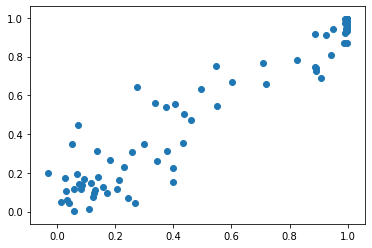

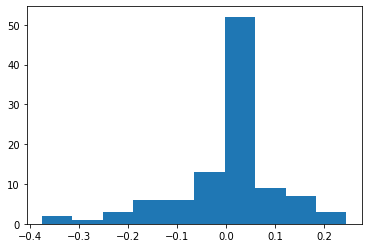

In [ ]:
# Make Predictions
preds = model.predict(test_X, batch_size=128)
# Mean Squared Error
mse = mean_squared_error(test_Y,preds)
# RMSE
rmse = np.sqrt(mse)
# R2
r2 = r2_score(test_Y,preds)
print('RMSE=',format(rmse*100,'.2f'),'%')
print('R2=',format(r2,'.3f'))

f = plt.figure(1)
plt.scatter(test_Y,preds)
f.show

test_Y = np.asarray(test_Y,dtype=np.float32)
test_Y = np.reshape(test_Y,(len(test_Y),1))

g = plt.figure(2)
error = (test_Y-preds)
plt.hist(error,bins=10)
g.show

